# team `misfits`

## ML Model to detect probability of Credit Card Default


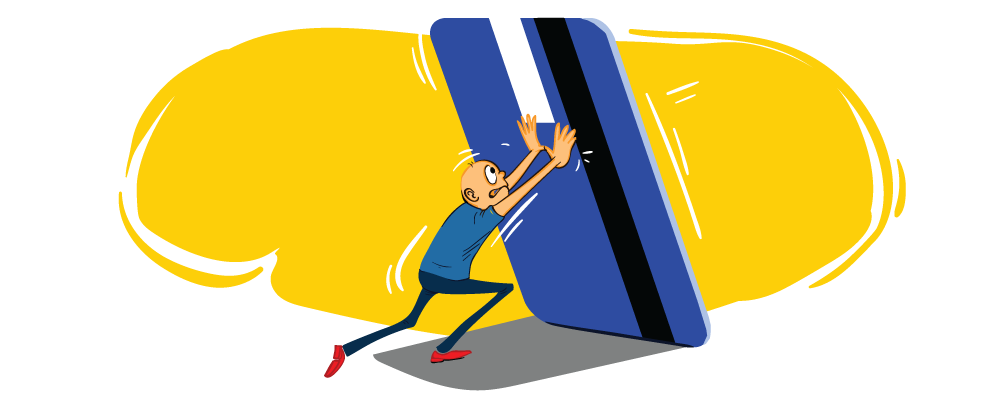


***
Team Members

Abhinav Anand | Rajesh Upadhyay | Yuvraj Kale | Sandip Baradiya | Saiprasad Balasubramanian

Problem Statement:
===================

Build a model to compute probability of default for Taiwanese Credit Card Clients

Dataset: [Link](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)	

Credits: I-Cheng Yeh, Department of Information Management, Chung Hua University, Taiwan

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Journey of simple set of data to a full fledged model:
===================

- Simple Exploration: Understanding the Data Dictionary
- Exploratory Data Analysis
- Cleaning the Data
    - Data Summary
    - Detecting Outliers && Missing Values
    - Defaulter Cross Tab Analysis
    - Data Imbalance
    - Data Transformation && Preprocessing
    - Data Normalization


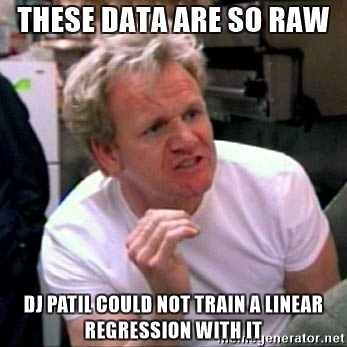


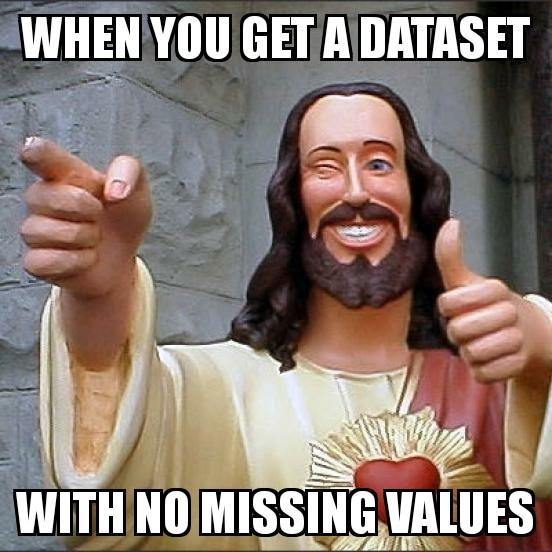


Journey Continues (ML isn't that easy!)
===================
- Feature Engineering && PCA
- Test / Train Split using Stratified Sampling
- Baseline Model
...
...
- You know what happens ahead!

In [3]:
#names = ['id', 'limit_bal','sex','education','marriage','age','pay_september','pay_august','pay_july','pay_june','pay_may','pay_april','bill_september','bill_august','bill_july','bill_june','bill_may','bill_april','pay_amt_september','pay_amt_august','pay_amt_july','pay_amt_june','pay_amt_may','pay_amt_april','default']
df = pd.read_csv('../arranged_data.csv')
df.head()

,Unnamed: 0,id,limit_bal,sex,education,marriage,age,pay_september,pay_august,pay_july,...,bill_june,bill_may,bill_april,pay_amt_september,pay_amt_august,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,default
0,2,1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,3,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,4,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,5,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,6,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.describe(include='all')

,Unnamed: 0,id,limit_bal,sex,education,marriage,age,pay_september,pay_august,pay_july,...,bill_june,bill_may,bill_april,pay_amt_september,pay_amt_august,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15001.500000,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,2.000000,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7501.750000,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15001.500000,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22501.250000,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30001.000000,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
#finding missing values
#-------------------------------------

In [6]:
df.isnull().values.ravel().sum()

0

In [7]:
#finding outliers
#-------------------------------------

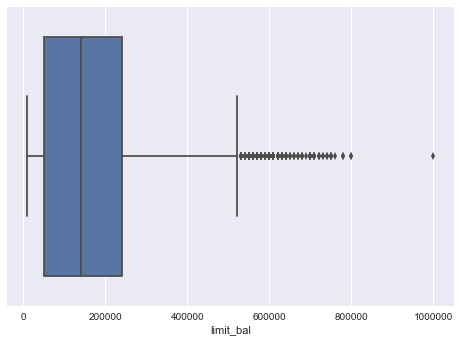

In [8]:
df['limit_bal'] = pd.to_numeric(df['limit_bal'])
sns.boxplot(x=df["limit_bal"])
plt.show()

In [9]:
q = df["limit_bal"].quantile(0.99)
print q

500000.0


In [10]:
#removing outliers are supported by business rational

In [11]:
#feature selection
#-------------------------------------

In [12]:
x_cor1 = df.iloc[:,0:-1]
x_cor1.head()

,Unnamed: 0,id,limit_bal,sex,education,marriage,age,pay_september,pay_august,pay_july,...,bill_july,bill_june,bill_may,bill_april,pay_amt_september,pay_amt_august,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april
0,2,1,20000,2,2,1,24,2,2,-1,...,689,0,0,0,0,689,0,0,0,0
1,3,2,120000,2,2,2,26,-1,2,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,4,3,90000,2,2,2,34,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,5,4,50000,2,2,1,37,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,6,5,50000,1,2,1,57,-1,0,-1,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [13]:
# variable standrization in X & Y terms.......
y = df['default']
# numerical variables for corr
x_for_cor1 = df[['limit_bal','sex','education','marriage','age','pay_september','pay_august','pay_july','pay_june','pay_may','pay_april','bill_september','bill_august','bill_july','bill_june','bill_may','bill_april','pay_amt_september','pay_amt_august','pay_amt_july','pay_amt_june','pay_amt_may','pay_amt_april']]
x_for_cor1.head()
# correlation heat map 


,limit_bal,sex,education,marriage,age,pay_september,pay_august,pay_july,pay_june,pay_may,...,bill_july,bill_june,bill_may,bill_april,pay_amt_september,pay_amt_august,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [14]:
#x_for_cor1.corr()

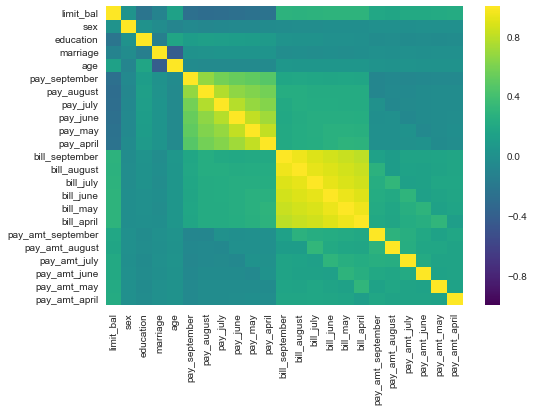

In [15]:
sns.heatmap(x_for_cor1.corr(), cmap='viridis')
plt.show()

In [16]:
#Training - Test Data Split & Data Encoding
#-------------------------------------

In [17]:
sex = pd.get_dummies(df.sex)
sex.columns = ['Male', 'Female']
df['education'].replace(6,4,inplace = True)
df['education'].replace(5,4,inplace = True)
df['education'].replace(0,4,inplace = True)
edu = pd.get_dummies(df.education)
df.head()

,Unnamed: 0,id,limit_bal,sex,education,marriage,age,pay_september,pay_august,pay_july,...,bill_june,bill_may,bill_april,pay_amt_september,pay_amt_august,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,default
0,2,1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,3,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,4,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,5,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,6,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
edu.columns = ['grad', 'uni', 'high', 'edu_other']
df['marriage'].replace(0,3, inplace = True)
mar = pd.get_dummies(df.marriage)
mar.columns = ['married', 'single', 'others']
final_df = pd.concat([df, sex, edu, mar], axis=1)
final_df.drop('education', axis = 1, inplace = True)
final_df.drop('marriage', axis = 1, inplace = True)
final_df.drop('sex', axis = 1, inplace = True)
#final_df.head()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
def split_strat_train_test(data, strat_key, test_ratio):
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_ratio, random_state=42)
    for train_index, test_index in split.split(data, data[strat_key]):
        strat_train_set = data.loc[train_index]
        strat_test_set = data.loc[test_index]
    return strat_train_set, strat_test_set

In [20]:
train_set, test_set = split_strat_train_test(df, "default", 0.2)
train_set.to_csv('final_train_set.csv')
test_set.to_csv('final_test_set.csv')

In [21]:
#reading splited data files
train_data = pd.read_csv('./final_train_set.csv')
test_data = pd.read_csv('./final_test_set.csv')
X_test = test_data.iloc[:,0:-1]
y_test = test_data.iloc[:,-1]
X_train = train_data.iloc[:,0:-1]
y_train = train_data.iloc[:,-1]

In [22]:
#Base model - Logistic Regression
#---------------------------------

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [24]:
logistic_regressor = LogisticRegression()
#pipeline = Pipeline(steps=[('add_poly_features', PolynomialFeatures()),
                         #  ('logistic_regression', logistic_regressor)])

In [25]:
logistic_regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
from sklearn.metrics import precision_score, roc_auc_score, roc_curve,accuracy_score
#pipeline.fit(X_train, y_train)
#y_pred = pipeline.predict(X_test)
#y_pre_proba = pipeline.predict_proba(X_test)

logistic_regressor.fit(X_train, y_train)
y_pred = logistic_regressor.predict(X_test)
y_pre_proba = logistic_regressor.predict_proba(X_test)

#print logistic_regressor.coef_
print 'Accurancy- {}'.format(accuracy_score(y_test, y_pred))
print 'Precision- {}'.format(precision_score(y_test,y_pred))
print 'ROCAUC- {}'.format(roc_auc_score(y_test,y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pre_proba[:,1])
print 'fpr- {}'.format(fpr)
print 'tpr- {}'.format(tpr)
print 'thresholds- {}'.format(thresholds)

Accurancy- 0.778833333333
Precision- 0.0
ROCAUC- 0.5
fpr- [  0.00000000e+00   2.13995292e-04   6.41985876e-04 ...,   9.98716028e-01
   9.98716028e-01   1.00000000e+00]
tpr- [ 0.          0.          0.         ...,  0.99924642  1.          1.        ]
thresholds- [  1.47541128e+00   4.75411281e-01   4.72729845e-01 ...,   1.09768372e-04
   1.00569915e-04   1.65199128e-18]


/Users/sandip/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


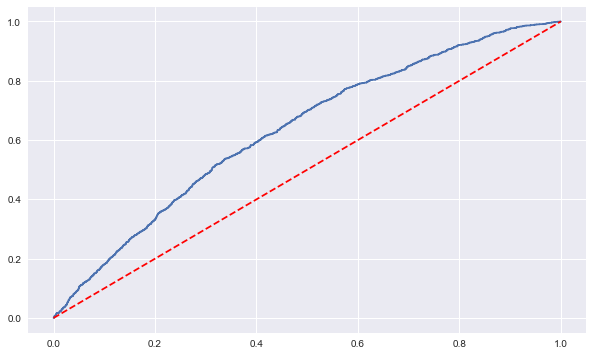

In [27]:
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.show()

In [28]:
#Random Forest
#---------------------------

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [29]:
clf_1 = RandomForestClassifier(min_samples_leaf=10, random_state=9)
clf_1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=9,
            verbose=0, warm_start=False)

In [30]:
# predicting for min_samples 0f leaf as 2.
y_clf_1 = clf_1.predict(X_test)

In [31]:
#calculate accuracy and roc auc score for min leaf samples
accuracy_clf_1 = accuracy_score(y_test, y_clf_1)
auc_roc1 = roc_auc_score(y_test, y_clf_1)
print("Accuracy score of the model with min sample leaf 2 is: {}".format(accuracy_clf_1))
print("roc_auc_score of the model1 is: {}".format(auc_roc1))

Accuracy score of the model with min sample leaf 2 is: 0.816166666667
roc_auc_score of the model1 is: 0.653467683244


In [41]:
#plot tree
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier 

clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf_entropy.fit(X_train, y_train)
cc = 'limit_bal','sex','education','marriage','age','pay_september','pay_august','pay_july','pay_june','pay_may','pay_april','bill_september','bill_august','bill_july','bill_june','bill_may','bill_april','pay_amt_september','pay_amt_august','pay_amt_july','pay_amt_june','pay_amt_may','pay_amt_april'

#cc = 'limit_bal','sex','education','marriage','age','pay_september','pay_august','pay_july','pay_june','pay_may','pay_april','bill_september','bill_august','bill_july','bill_june','bill_may','bill_april','pay_amt_september','pay_amt_august','pay_amt_july','pay_amt_june','pay_amt_may','pay_amt_april'
yy = 'default'
dot_data = tree.export_graphviz(clf_entropy, out_file=None,
                               feature_names=cc,
                               class_names=yy,
                               filled=True, rounded=True,
                               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

IndexError: tuple index out of range